<a href="https://colab.research.google.com/github/Labibbib/Case-Study-03-Group-F/blob/main/CS3_part2_RandomForest_GroupF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

[Errno 2] No such file or directory: 'data/Ashrae_Energy_Mean.csv'  Trying to load data from GitHub.
--2024-11-24 15:19:25--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241207 (236K) [text/plain]
Saving to: ‘data/Ashrae_Energy_Mean.csv’

Ashrae_Energy_Mean. 100%[===================>] 235.55K  --.-KB/s    in 0.04s   

2024-11-24 15:19:25 (5.74 MB/s) - ‘data/Ashrae_Energy_Mean.csv’ saved [241207/241207]

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


In [4]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
meter_reading,1413.0,NaN,NaN,NaN,185.383188,374.8995,0.0004,27.224943,74.933148,182.884848,5072.323426
primary_use,1413,16,Education,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_feet,1413.0,NaN,NaN,NaN,92204.79264,111412.340117,283.0,22949.0,57673.0,115288.0,875000.0
year_built,663.0,NaN,NaN,NaN,1968.170437,31.026539,1900.0,1949.5,1970.0,1995.5,2017.0
floor_count,352.0,NaN,NaN,NaN,3.738636,3.336731,1.0,1.0,3.0,5.0,26.0
air_temperature,1413.0,NaN,NaN,NaN,15.697154,5.416736,7.572136,11.058629,15.204244,21.325261,24.963702
cloud_coverage,1396.0,NaN,NaN,NaN,2.166618,1.461644,0.059266,0.665832,2.083712,2.998727,5.671785
dew_temperature,1413.0,NaN,NaN,NaN,8.259831,4.625295,-0.304675,4.512823,8.285693,9.834399,17.379328
precip_depth_1_hr,1237.0,NaN,NaN,NaN,1.18786,1.478667,0.155325,0.775686,0.89598,1.033215,11.675633
sea_level_pressure,1324.0,NaN,NaN,NaN,1016.46699,1.921973,1011.436563,1016.404579,1016.797495,1017.949437,1018.052063


In [5]:
df.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
year_built,750
floor_count,1061
air_temperature,0
cloud_coverage,17
dew_temperature,0
precip_depth_1_hr,176
sea_level_pressure,89


# **PREPROCCESING**

# **Mengubah Tipe Data**

In [6]:
# Mengubah tipe data 'primary_use'
df['primary_use'] = df['primary_use'].astype('category')

# **Duplikat**

In [7]:
df.duplicated().sum()

0

In [8]:
col_num = ['meter_reading','square_feet','floor_count','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']
df[col_num].corr()

,meter_reading,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter_reading,1.000000,0.583356,0.446672,-0.034220,0.018100,-0.017421,0.387546,-0.004600,-0.001357,-0.073006
square_feet,0.583356,1.000000,0.537979,-0.022617,-0.045953,-0.076130,0.135071,-0.072661,-0.075351,-0.125481
floor_count,0.446672,0.537979,1.000000,-0.349697,-0.255937,-0.294305,0.368142,-0.375738,0.404375,-0.046254
air_temperature,-0.034220,-0.022617,-0.349697,1.000000,0.096532,0.569026,-0.403071,-0.310915,-0.756898,-0.600079
cloud_coverage,0.018100,-0.045953,-0.255937,0.096532,1.000000,0.095455,-0.185038,0.207704,0.151642,0.413007
dew_temperature,-0.017421,-0.076130,-0.294305,0.569026,0.095455,1.000000,-0.134132,0.453920,-0.471817,-0.231857
precip_depth_1_hr,0.387546,0.135071,0.368142,-0.403071,-0.185038,-0.134132,1.000000,0.173143,0.238778,0.090694
sea_level_pressure,-0.004600,-0.072661,-0.375738,-0.310915,0.207704,0.453920,0.173143,1.000000,0.144074,0.198839
wind_direction,-0.001357,-0.075351,0.404375,-0.756898,0.151642,-0.471817,0.238778,0.144074,1.000000,0.842631
wind_speed,-0.073006,-0.125481,-0.046254,-0.600079,0.413007,-0.231857,0.090694,0.198839,0.842631,1.000000


#**Missing value**

In [9]:
#Menghapus missing value yang lebih dari 50%
df.drop(['floor_count', 'year_built'], axis=1, inplace=True)

In [10]:
# Misalnya, df adalah DataFrame Anda
missing_values = df.isnull().sum()  # Menghitung jumlah missing value per kolom
missing_percentage = (missing_values / len(df)) * 100  # Menghitung persentase missing value

# Menampilkan hasilnya dalam bentuk DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Menyaring kolom yang memiliki missing value
print(missing_data)

                    Missing Values  Percentage
cloud_coverage                  17    1.203114
precip_depth_1_hr              176   12.455768
sea_level_pressure              89    6.298655


In [11]:
# Mengganti missing values dengan median untuk setiap kolom

df['cloud_coverage'] = df['cloud_coverage'].fillna(df['cloud_coverage'].median())
df['precip_depth_1_hr'] = df['precip_depth_1_hr'].fillna(df['precip_depth_1_hr'].median())
df['sea_level_pressure'] = df['sea_level_pressure'].fillna(df['sea_level_pressure'].median())

#**Noise**

In [12]:
# Fungsi untuk memeriksa data
def chechk_values(column_name, set):
  data_filter = []
  for key in set:
    data_filter.append(df[df[column_name] == key])
  result = pd.concat(data_filter, ignore_index=False)
  return result.T

# Fungsi untuk memeriksa noise
def check_unique_values(columns):
    # columns = list(df.columns)
    for column in columns:
        print("\n", column)
        print(df[column].unique())

# Fungsi untuk merubah nilai noise
def replace_value(column_name, set):
    df[column_name].replace(set, inplace=True)

In [13]:

#mengecek noise
check_unique_values(df)


 meter_reading
[237.7491275  118.55374309  23.62649987 ...   7.21134691 187.11799411
   3.33859478]

 primary_use
['Education', 'Lodging/residential', 'Office', 'Entertainment/public assembly', 'Other', ..., 'Healthcare', 'Utility', 'Technology/science', 'Manufacturing/industrial', 'Services']
Length: 16
Categories (16, object): ['Education', 'Entertainment/public assembly',
                          'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science',
                          'Utility', 'Warehouse/storage']

 square_feet
[ 7432  2720  5376 ... 11265 29775 92271]

 air_temperature
[22.74481579 12.01550697 24.96370238 15.50251797 14.72536218 11.05862891
 15.20424406  7.57213642 21.32526143 11.70435446  9.95909196  9.11562797
 13.10965386  9.07913823]

 cloud_coverage
[2.99872748 0.05926623 2.08371163 4.07923534 1.84457582 0.38835402
 0.68108879 0.59239634 0.33895771 5.67178518 2.77878719 0.66583213
 1.0921006 ]

 dew_temperature
[17.37932778  7.57810735  3.90

#**Outlier**

In [14]:
import pandas as pd

# Menyaring kolom numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Menghitung Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk masing-masing kolom
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data yang dianggap outlier
outlier_condition = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Menampilkan data yang dianggap outlier
outliers_df= df[outlier_condition.any(axis=1)]  # Menampilkan baris yang memiliki nilai outlier
print(outliers_df)

      meter_reading                    primary_use  square_feet  \
4       1579.174237                      Education       116607   
7        569.244417                      Education       121074   
8        417.394827                      Education        60809   
10      1593.610509  Entertainment/public assembly       370773   
11       475.006736                      Education        49073   
...             ...                            ...          ...   
1408       7.484137  Entertainment/public assembly        19619   
1409       4.732815                      Education         4298   
1410       7.211347  Entertainment/public assembly        11265   
1411     187.117994            Lodging/residential        29775   
1412       3.338595                         Office        92271   

      air_temperature  cloud_coverage  dew_temperature  precip_depth_1_hr  \
4           22.744816        2.998727        17.379328           1.240589   
7           22.744816        2.998727    

In [15]:
df.shape

(1413, 10)

Karena Regresi Random Forest Robuts terhadap Outlier, Maka outlier tidak kita buang

# **Random Forest Regressor**

###Memilih Variabel Numerik

In [16]:
num_col = df.select_dtypes(include=['number']).columns
df_num = df[num_col]

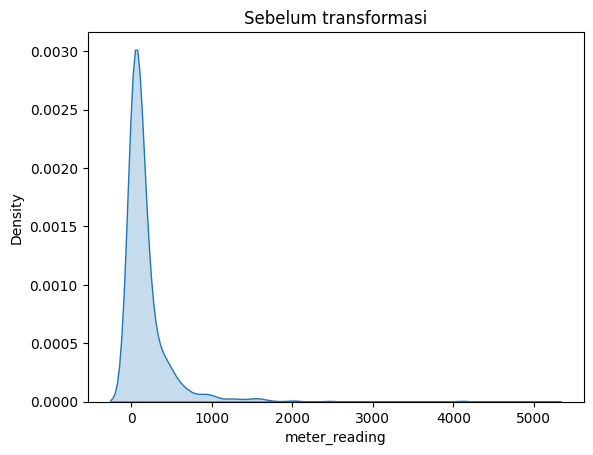

tingkat skewness: 6.545827017861556


In [17]:
from scipy.stats import skew

sns.kdeplot(data=df_num['meter_reading'], fill=True)
plt.title('Sebelum transformasi')
plt.show()

print('tingkat skewness:',skew(df_num['meter_reading'], nan_policy='omit'))
# variabel target 'meter_reading' terlihat ada skew yang signifikan

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Pisahkan fitur dan target
X = df_num.drop(columns=['meter_reading'])  # Fitur
y = df_num['meter_reading']  # Target

# 2. Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:

import numpy as np

# Transformasi log pada target
y_train_log = np.log1p(y_train)  # log(1 + y)
y_test_log = np.log1p(y_test)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor  # Untuk regresi, ganti dengan RandomForestClassifier jika klasifikasi
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Tentukan parameter grid yang ingin dicari
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],  # Jumlah minimum sampel yang dibutuhkan untuk membagi node
    'min_samples_leaf': [1, 2, 4],    # Jumlah minimum sampel di daun
    'max_features': ['sqrt', 'log2']  # Berapa banyak fitur yang digunakan untuk setiap pembelahan
}

# Inisialisasi RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=2,                   # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Metrik evaluasi (bisa disesuaikan)
    n_jobs=-1,              # Gunakan semua core CPU untuk mempercepat
    verbose=1               # Menampilkan proses
)

grid_search.fit(X_train, y_train_log)

# Menampilkan hasil pencarian grid
print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Prediksi pada data test
y_pred = best_model.predict(X_test)

# Hitung MSE
mse = mean_squared_error(y_test_log, y_pred)
print(f"Mean Squared Error (MSE) dengan parameter terbaik: {mse}")

Fitting 2 folds for each of 216 candidates, totalling 432 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (MSE) dengan parameter terbaik: 0.5777382044204894


In [21]:
# Buat model baru dengan best param
model_rf_new = RandomForestRegressor(random_state=42, **grid_search.best_params_)
model_rf_new.fit(X_train, y_train_log)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200, random_state=42)

In [22]:
# Prediksi dengan data testing
y_pred_new = model_rf_new.predict(X_test)

# Evaluasi model
mse_pred_new = mean_squared_error(y_test_log, y_pred_new)
r2 = r2_score(y_test_log, y_pred_new)

print(f'Mean Squared Error (MSE): {mse_pred_new}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.5777382044204894
R-squared (R2): 0.7422344458962629


In [23]:
#Evaluasi pada data training
y_pred_train_new = model_rf_new.predict(X_train)


mse_pred_train_new = mean_squared_error(y_train_log, y_pred_train_new)
r2_train_new = r2_score(y_train_log, y_pred_train_new)

# Evaluasi pada data testing
y_pred_test_new = model_rf_new.predict(X_test)
mse_pred_test_new = mean_squared_error(y_test_log, y_pred_test_new)
r2_test_new = r2_score(y_test_log, y_pred_test_new)

print(f'Training- MSE: {mse_pred_train_new}, R²: {r2_train_new}')
print(f'Testing- MSE: {mse_pred_test_new}, R²:{r2_test_new}')

Training- MSE: 0.5151634728966075, R²: 0.7461570966250024
Testing- MSE: 0.5777382044204894, R²:0.7422344458962629


**Penjelasan**

- Nilai R² pada data training cukup tinggi menunjukkan bahwa Model menjelaskan sebagian besar  pada variasi data training, yang artinya model sangat cocok untuk data yang dilatih.
- Nilai R² pada data testing cukup tinggi, ini menunjukkan bahwa Model berhasil menjelaskan sebagian besar variasi dalam data testing, yang artinya performa model pada data baru atau data yang tidak dilatih cukup baik.

- Perbedaan kecil antara nilai R² training dan testing serta MSE training dan MSE testing menunjukkan bahwa model tidak overfitting maupun underfitting. Artinya, model tidak hanya bekerja baik pada data training, tetapi juga memiliki kemampuan generalisasi yang baik untuk data baru.

In [24]:
from sklearn.metrics import mean_squared_log_error

# Menghitung RMSLE untuk data training dan testing
rmsle_train = np.sqrt(mean_squared_log_error(y_train_log, y_pred_train_new))
rmsle_test = np.sqrt(mean_squared_log_error(y_test_log, y_pred_test_new))

# Menampilkan hasil RMSLE
print(f'RMSLE untuk Training Data: {rmsle_train}')
print(f'RMSLE untuk Testing Data: {rmsle_test}')

RMSLE untuk Training Data: 0.1704641127613245
RMSLE untuk Testing Data: 0.1772024739679512


**Kesimpulan:**

Hasil RMSLE di data training dan testing hampir sama, ini mengindikasikan bahwa model Random Forest Regression dapat diandalkan untuk memberikan hasil yang baik dalam data prediksi konsumsi energi gedung.

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np


# Cross-validation untuk menghitung R2 dan MSE
cross_val_r2 = cross_val_score(model_rf_new, X_train, y_train_log, cv=5, scoring='r2')  # Menggunakan R^2 untuk cross-validation
cross_val_mse = cross_val_score(model_rf_new, X_train, y_train_log, cv=5, scoring='neg_mean_squared_error')  # MSE dalam cross-validation

# Hasil cross-validation (nilai R^2 dan MSE)
print(f"Cross-Validation R^2: {cross_val_r2.mean()} ± {cross_val_r2.std()}")
print(f"Cross-Validation MSE: {-cross_val_mse.mean()} ± {cross_val_mse.std()}")  # MSE dicetak dengan tanda negatif yang perlu dibalik

# Prediksi baseline menggunakan rata-rata dari y_train
baseline_predictions = [y_train_log.mean()] * len(y_train_log)
baseline_mse = mean_squared_error(y_train_log, baseline_predictions)

print(f"Baseline MSE (using y_train.mean()): {baseline_mse}")

Cross-Validation R^2: 0.6189449148465265 ± 0.05602148953969714
Cross-Validation MSE: 0.7710537444417433 ± 0.11780640815615272
Baseline MSE (using y_train.mean()): 2.029457849903197


**Penjelasan:**

MSE hasil cross-validation lebih kecil daripada baseline MSE, hal ini menunjukkan hasil yang positif, itu berarti model mampu memprediksi nilai target dengan kesalahan yang lebih kecil dibandingkan tebakan sederhana.

#**Visualisasi**

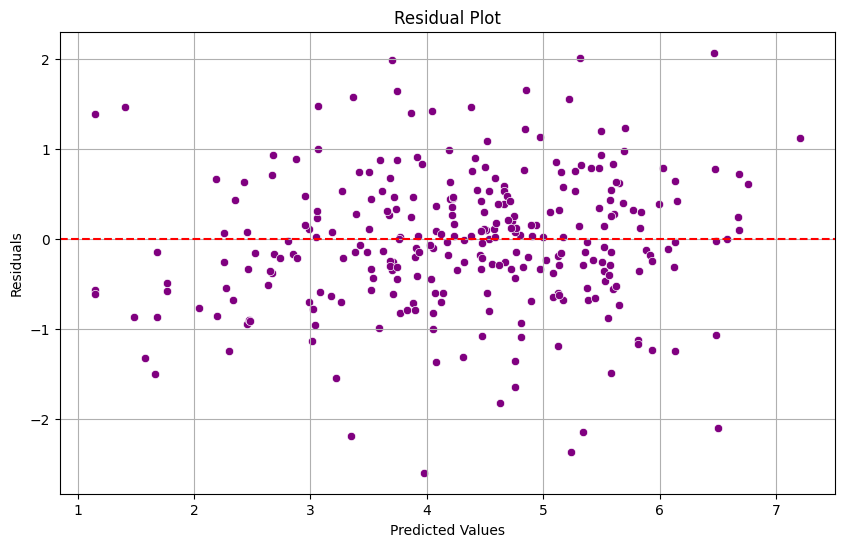

In [26]:
# Menghitung residuals
residuals = y_test_log - y_pred_test_new

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_new, y=residuals, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid()
plt.show()

**Interpretasi**

Pada grafik Residual plot menunjukkan:  
- Residual tersebar di sekitar garis nol (garis merah putus-putus), menunjukkan bahwa model tidak memiliki bias sistematis dalam prediksinya.
- Sebagian besar residual berada dalam rentang -2 hingga 2, yang berarti error prediksi relatif kecil.
- Tidak terlihat pola jelas (misalnya, kurva atau kluster), yang menunjukkan model sudah cukup baik dalam menangkap hubungan data.
- Terdapat beberapa outlier (titik residual jauh dari garis nol), itu bisa mengindikasikan bahwa model tidak mampu menangkap sebagian kecil variasi data.

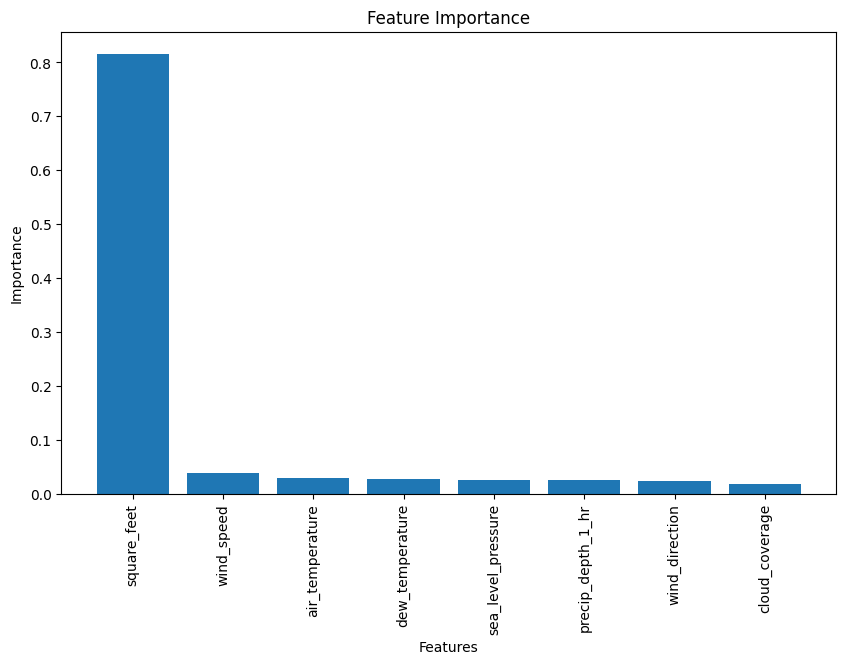

In [27]:

import matplotlib.pyplot as plt
import numpy as np

# Mendapatkan nilai feature importance dari model
importances = model_rf_new.feature_importances_
feature_names = X_train.columns  # Pastikan ini sesuai dengan nama fitur Anda

# Mengurutkan berdasarkan pentingnya fitur
indices = np.argsort(importances)[::-1]

# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [28]:
import pandas as pd

# Mendapatkan nilai feature importance dari model
importances = model_rf_new.feature_importances_
feature_names = X_train.columns  # Pastikan ini sesuai dengan nama fitur Anda

# Membuat DataFrame untuk menampilkan feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Mengurutkan berdasarkan importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan DataFrame
print(feature_importance_df)

              Feature  Importance
0         square_feet    0.816148
7          wind_speed    0.038462
1     air_temperature    0.028394
3     dew_temperature    0.026335
5  sea_level_pressure    0.024801
4   precip_depth_1_hr    0.024315
6      wind_direction    0.024148
2      cloud_coverage    0.017396


# **Interpretasi**

Pada grafik feature Importance menunjukkan variabel mana yang paling berpengaruh terhadap meter_reading:

1. Ukuran bangunan (square_feet) dengan importance 0,8161
**Interpretasi** : ukuran bangunan memiliki pengaruh yang sangat besar terhadap konsumsi energi. Artinya, semakin besar ukuran bangunan, semakin besar kemungkinan konsumsi energi akan meningkat.

**Rekomendasi**:
- Optimalkan Penggunaan Energi: Gunakan teknologi hemat energi (LED, peralatan efisien) dan tingkatkan efisiensi HVAC serta insulasi.
- Desain Ramah Energi: Manfaatkan pencahayaan alami, ventilasi silang, dan material efisien energi untuk bangunan besar.
Audit Energi Rutin: Terapkan audit energi untuk bangunan besar untuk mengurangi pemborosan energi.
-
Monitor Energi Secara Real-time: Gunakan sistem monitoring energi berbasis IoT untuk pengelolaan yang lebih efisien.
     

2. Kecepatan Angin (wind_speed) dengan Importance: 0.0384

**Interpretasi**: Kecepatan angin berpengaruh sedikit lebih besar dibandingkan variabel lain, tetapi tetap signifikan. Angin yang lebih kencang dapat mempengaruhi kebutuhan pemanasan atau pendinginan, terutama di daerah yang dingin.

**Rekomendasi**: Pertimbangkan kecepatan angin dalam perencanaan sistem energi, khususnya di daerah yang rawan angin kencang. Misalnya, menggunakan bahan bangunan yang lebih tahan terhadap angin atau sistem pengaturan suhu yang lebih efisien.

3. Suhu Udara (air_temperature) dengan Importance: 0.0283

**Interpretasi**: Suhu udara juga mempengaruhi konsumsi energi, meskipun kontribusinya lebih kecil. Perubahan suhu dapat meningkatkan kebutuhan pemanasan atau pendinginan.

**Rekomendasi**: Sesuaikan sistem energi (seperti AC atau pemanas) dengan perubahan suhu eksternal untuk menghemat energi. Misalnya, menggunakan termostat pintar yang otomatis menyesuaikan suhu.

4. Suhu Titik Embun (dew_temperature) dengan Importance: 0.0263

**Interpretasi**: Suhu titik embun mempengaruhi kelembapan udara, yang berperan dalam kenyamanan dan efisiensi energi. Suhu yang lebih tinggi dapat meningkatkan kelembapan dan meningkatkan kebutuhan pendinginan.
**Rekomendasi**: Memperhatikan suhu titik embun dalam perencanaan pengendalian suhu udara di dalam bangunan, terutama di daerah dengan kelembapan tinggi.

5. Arah Angin (wind_direction) dengan Importance: 0.0248

**Interpretasi**: Arah angin sedikit berpengaruh, karena dapat mempengaruhi suhu atau kelembapan yang mencapai bangunan. Namun, dampaknya cenderung lebih kecil dibandingkan dengan kecepatan angin.

**Rekomendasi**: Gunakan informasi arah angin untuk merancang bangunan atau sistem pemanasan yang memanfaatkan arah angin yang dominan, seperti menggunakan ventilasi alami.

6. Tekanan Udara (sea_level_pressure) dengan Importance: 0.0243

**Interpretasi**: Tekanan udara pada permukaan laut mempengaruhi cuaca dan suhu, tetapi dampaknya terhadap konsumsi energi relatif kecil.

**Rekomendasi**: Meskipun pengaruhnya kecil, tetap pertimbangkan tekanan udara dalam perencanaan sistem energi di wilayah yang rawan perubahan tekanan.

7. Kedalaman Curah Hujan (precip_depth_1_hr) dengan Importance: 0.0241

**Interpretasi**: Curah hujan dalam satu jam menunjukkan pengaruh yang kecil terhadap konsumsi energi. Meskipun hujan dapat mempengaruhi suhu dan kelembapan, dampaknya terhadap penggunaan energi tidak sebesar faktor lain.

**Rekomendasi**: Meskipun pengaruhnya kecil, tetap perhatikan curah hujan, terutama dalam merancang sistem drainase atau pengaturan suhu untuk menghindari kelembapan yang berlebihan di dalam bangunan.

8. Cakupan Awan (cloud_coverage) dengan Importance: 0.0173

**Interpretasi**: Cakupan awan mempengaruhi suhu dan cuaca, tetapi dampaknya terhadap konsumsi energi sangat kecil. Variabilitas dalam cakupan awan dapat memengaruhi suhu eksternal, namun tidak banyak mempengaruhi pengaturan suhu dalam bangunan.

**Rekomendasi**: Tidak perlu terlalu fokus pada cakupan awan dalam perencanaan energi, tetapi bisa dipertimbangkan dalam perencanaan suhu pada sistem energi berbasis cuaca.

**Kesimpulan Umum:**

Faktor yang paling berpengaruh adalah ukuran bangunan, yang menunjukkan pentingnya perencanaan bangunan yang efisien dalam penggunaan energi.
Faktor cuaca (kecepatan angin, suhu udara, arah angin, dan suhu titik embun) memiliki pengaruh yang lebih kecil, tetapi tetap penting untuk dipertimbangkan dalam perencanaan sistem energi.
Variabel seperti curah hujan dan cakupan awan menunjukkan pengaruh yang minimal terhadap konsumsi energi, sehingga tidak terlalu signifikan untuk dipertimbangkan dalam perencanaan energi bangunan.